# Assignment 4: More Matplotlib

#### Aandishah Samara
#### 4th October 2022
#### Research Computing for Environmental Science 
#### Professor Crone

# Problem 1: Line plots

In [2]:
### EXAMPLES

import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#Variables 
t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [3]:
units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


In [4]:
print(date[0])

2016-01-01T00:00:00.000000000


In [5]:
# Setting up Environment and loading Packages
import numpy as np
from matplotlib import pyplot as plt

In [6]:
print(date)
date.shape

['2016-01-01T00:00:00.000000000' '2016-01-02T00:00:00.000000000'
 '2016-01-03T00:00:00.000000000' ... '2018-12-29T00:00:00.000000000'
 '2018-12-30T00:00:00.000000000' '2018-12-31T00:00:00.000000000']


(1096,)

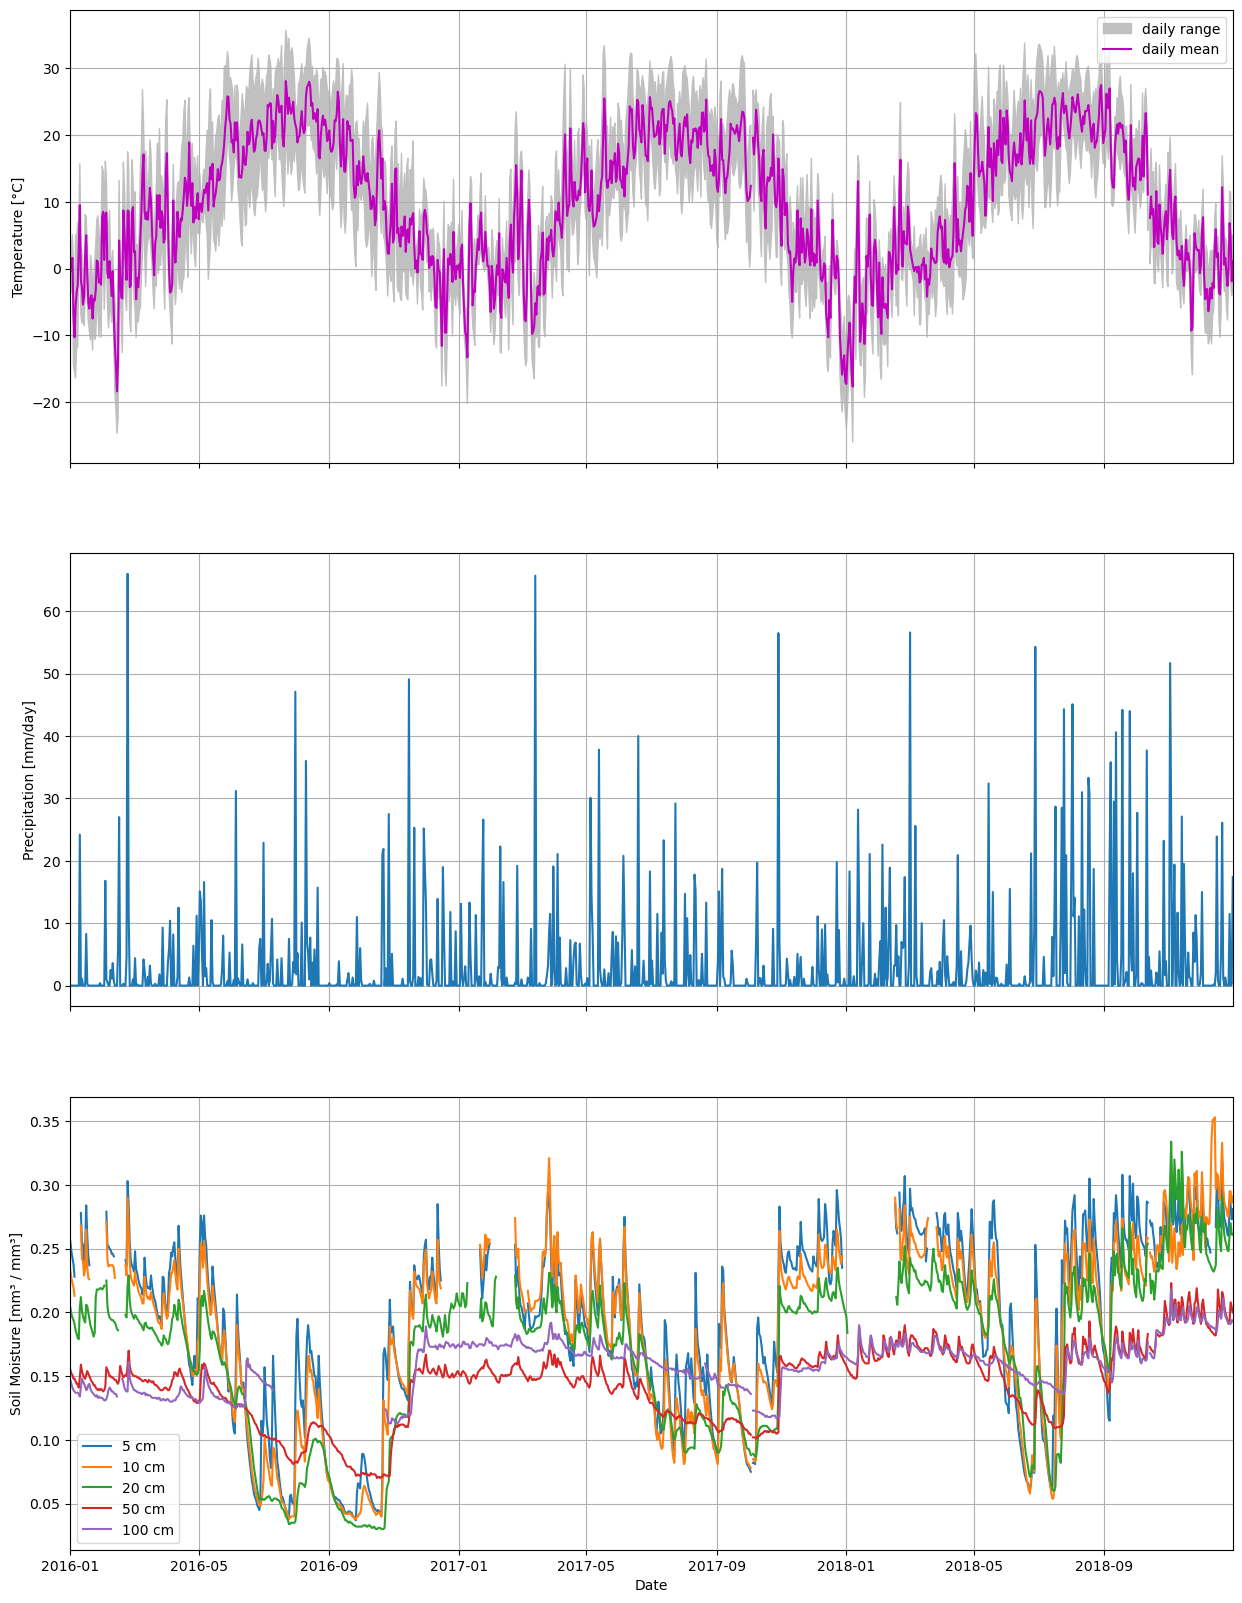

In [15]:
fig, ax = plt.subplots(figsize = (15, 20), nrows = 3)

# Figure 1 - Temperature
ax[0].fill_between(date, t_daily_max, t_daily_min, color = 'silver', label = "daily range") #Fix this 
ax[0].plot(date, t_daily_mean, color ='m', label = 'daily mean')
ax[0].grid()
ax[0].xaxis.set_ticklabels([])
ax[0].set_ylabel('Temperature [\N{DEGREE SIGN}C]')
ax[0].legend(loc='upper right')
ax[0].set_xlim(date[0], date[-1])

#Figure 2 - Precipitation
    
ax[1].plot(date, p_daily_calc)
ax[1].grid()
ax[1].xaxis.set_ticklabels([])
ax[1].set_ylabel('Precipitation [mm/day]')
ax[1].set_xlim(date[0], date[-1])

# Figure 3 - Soil Moisture

ax[2].plot(date, soil_moisture_5, 
           date, soil_moisture_10,
           date, soil_moisture_20,
           date, soil_moisture_50, 
           date, soil_moisture_100,)
ax[2].grid()
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Soil Moisture [mm\N{SUPERSCRIPT THREE} / mm\N{SUPERSCRIPT THREE}]')
ax[2].set_xlim(date[0], date[-1])
ax[2].legend(['5 cm', '10 cm', '20 cm', '50 cm', '100 cm'],loc = 'lower left') 
plt.show()

# Problem 2: Contour Plots

In [10]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values
#print(temp)
temp.shape, lat.shape, lon.shape

((94, 192), (94,), (192,))

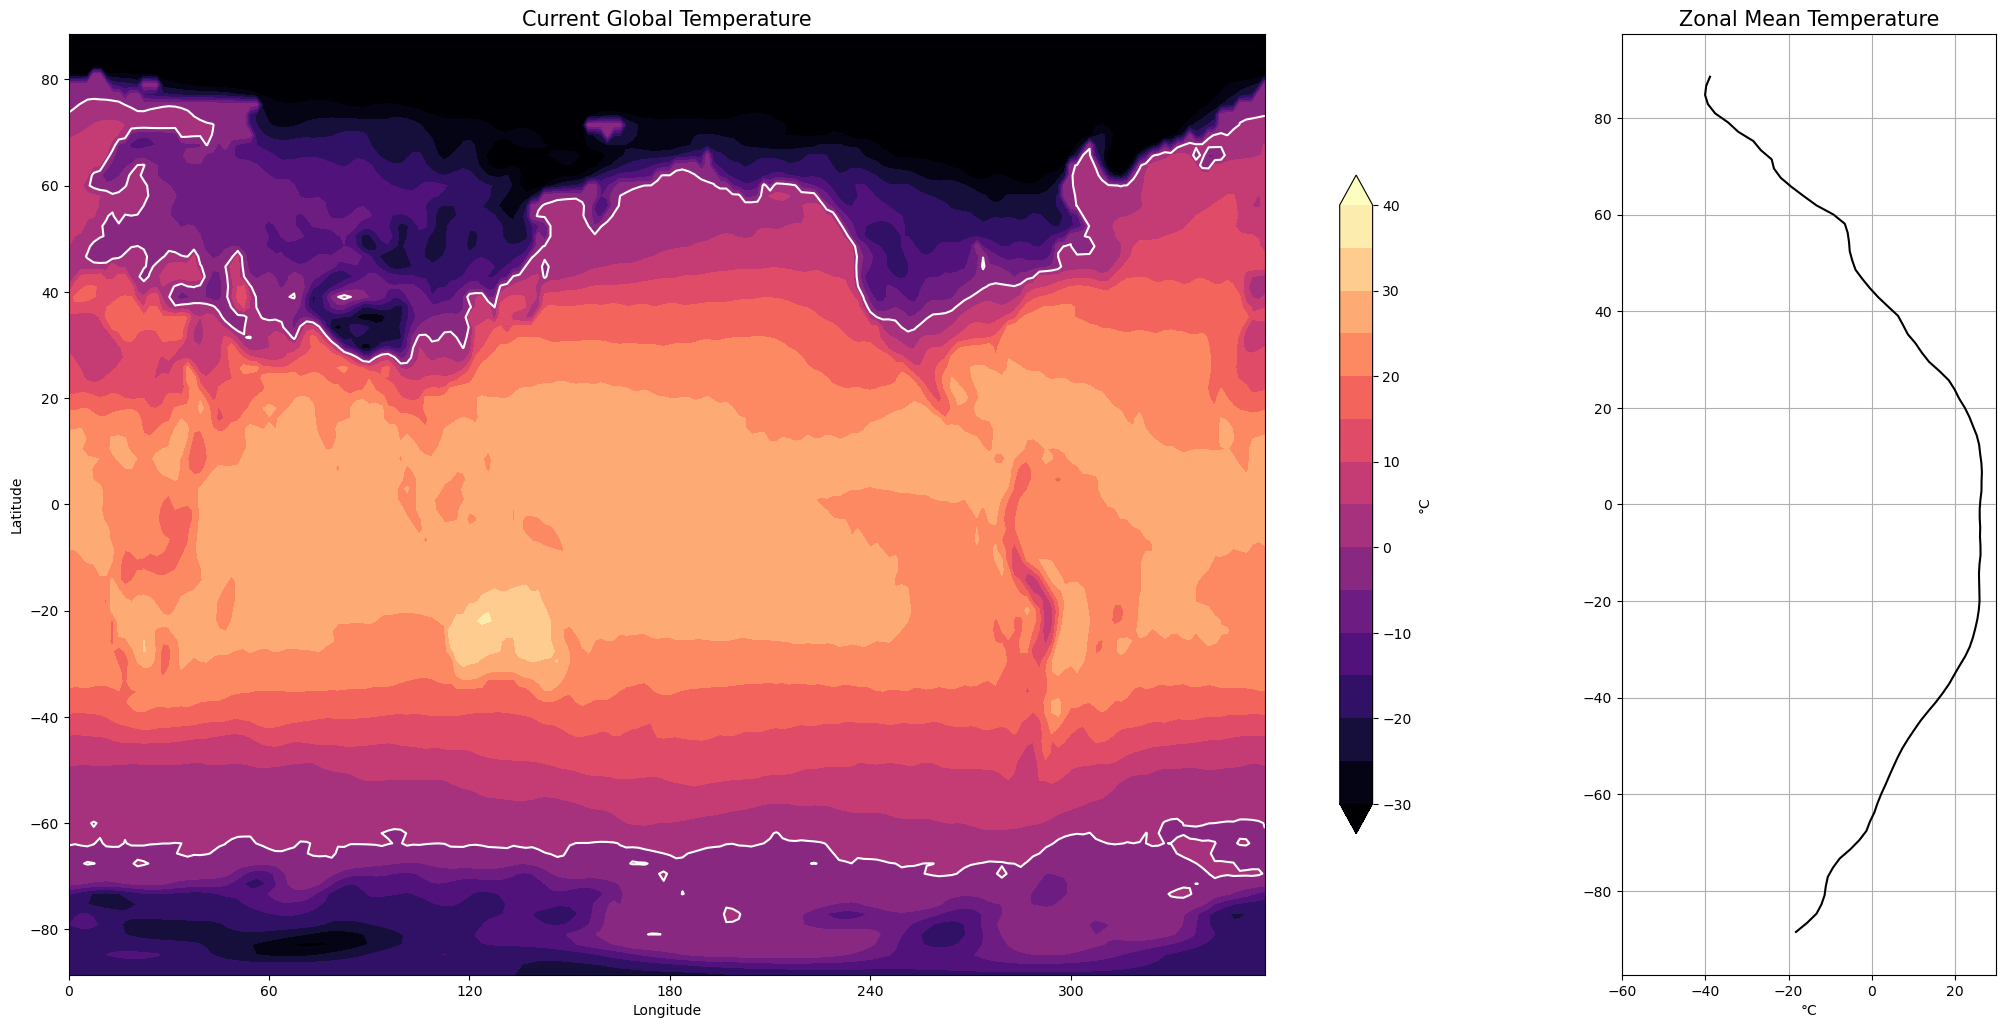

In [13]:
fig, ax = plt.subplots(figsize = [20, 10], ncols = 2, gridspec_kw={'width_ratios': [4, 1]})
fig.tight_layout()

#Figure 1 
levels = np.arange(-30,41,5)
temp_map = ax[0].contourf(lon, lat, temp, levels, cmap = "magma", extend = "both")
ax[0].contour(lon, lat, temp, levels=[0], colors = 'white', extend = "both")
ax[0].set_xticks([0, 60, 120, 180, 240, 300])
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
color_bar_ratio = temp.shape[0]/temp.shape[1] 
ax[0].set_title("Current Global Temperature", fontsize = 15)
plt.colorbar(temp_map, ax =ax[0], label ='\N{DEGREE SIGN}C', shrink = 0.7)
#plt.colorbar(temp_map, ax=ax[0], fraction=0.046*color_bar_ratio, pad=0.04, label ='\N{DEGREE SIGN}C')
#plt.colorbar(temp_map, ax=ax[0])

#Figure 2

#Zonal Mean Calculation
zonal_mean = np.mean(temp, axis=1)
ytick = np.arange(-80, 80, 10)
ax[1].plot(zonal_mean, lat, '-k')
ax[1].set_xlabel('\N{DEGREE SIGN}C')
ax[1].grid()
ax[1].set_xticks([-60, -40, -20, 0, 20])
ax[1].set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80])
ax[1].set_title('Zonal Mean Temperature', fontsize = 15) 
plt.show()

# Problem 3: Scatter plots

In [96]:
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

[nan nan 18. ... 26.  9. 10.]


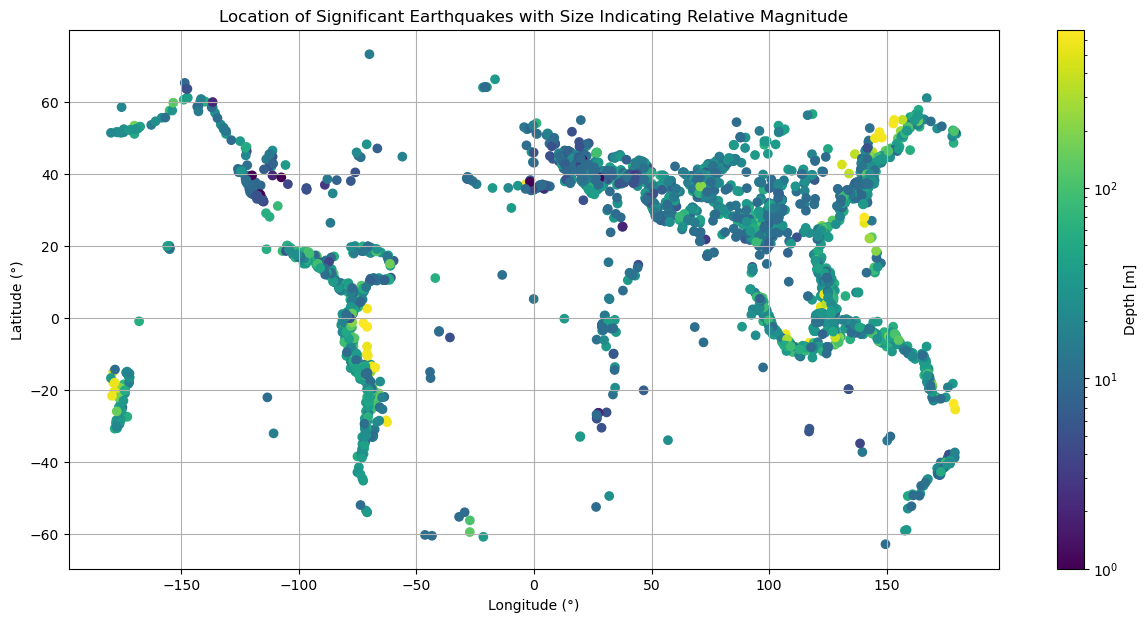

In [137]:
fig, ax = plt.subplots(figsize = (15, 7))
#depth_log = np.log(depth)
#splot = ax.scatter(longitude, latitude, c = depth) #does not change scale
splot = ax.scatter(longitude, latitude, c = depth, norm = "log")
ax.grid()
ax.set_xlabel("Longitude (\N{DEGREE SIGN})")
ax.set_ylabel("Latitude (\N{DEGREE SIGN})")
ax.set_title("Location of Significant Earthquakes with Size Indicating Relative Magnitude", fontsize =12)
fig.colorbar(splot, label = "Depth [m]")
plt.show()